## import  torch as t
from torch import nn
from torch.autograd import Variable as V


In [3]:
class Linear(nn.Module): #继承nn.Module
    def __init__(self, in_features,out_features):
        super(Linear,self).__init__() #等价于nn.Module.__init()__(self)
        self.w = nn.Parameter(t.randn(in_features,out_features))
        self.b = nn.Parameter(t.randn(out_features))
    
    def forward(self,x):
        x = x.mm(self.w)
        return x+self.b.expand_as(x)

In [4]:
layer = Linear(4,3)
input = V(t.randn(2,4))
output = layer(input)
output
layer

Linear()

In [5]:
 for name,parameter in layer.named_parameters():
        print(name,parameter)

w Parameter containing:
tensor([[-0.2495,  0.6774, -0.1573],
        [-0.8872,  1.7192,  0.4789],
        [ 1.1883, -0.6080,  0.4898],
        [-0.3689, -0.0192,  1.1414]], requires_grad=True)
b Parameter containing:
tensor([-0.3359, -0.2969,  2.0119], requires_grad=True)


In [6]:
class Perceptron(nn.Module):
    def __init__(self,in_features,hidden_features,out_features):
        nn.Module.__init__(self)
        self.layer1 = Linear(in_features,hidden_features)
        self.layer2 = Linear(hidden_features,out_features)
    def forward(self,x):
        x = self.layer1(x)
        x = t.sigmoid(x)
        return self.layer2(x)
        

In [7]:
perceptron = Perceptron(3,4,1)
for name,param in perceptron.named_parameters():
    print(name,param)

layer1.w Parameter containing:
tensor([[ 1.0705,  0.3245, -0.7676,  1.5273],
        [ 1.4972, -0.5228, -1.6355,  0.1559],
        [-0.9506,  0.2744, -0.4435, -0.6526]], requires_grad=True)
layer1.b Parameter containing:
tensor([ 0.2884, -2.7111, -0.7046, -1.3016], requires_grad=True)
layer2.w Parameter containing:
tensor([[-0.9881],
        [-0.3266],
        [ 0.8751],
        [-1.0580]], requires_grad=True)
layer2.b Parameter containing:
tensor([0.7123], requires_grad=True)


In [8]:
from PIL import Image
from torchvision.transforms import ToTensor,ToPILImage
to_tensor = ToTensor()# img->tensor
to_pil = ToPILImage()
lena = Image.open("imgs/lena.png")
input =  to_tensor(lena).unsqueeze(0)


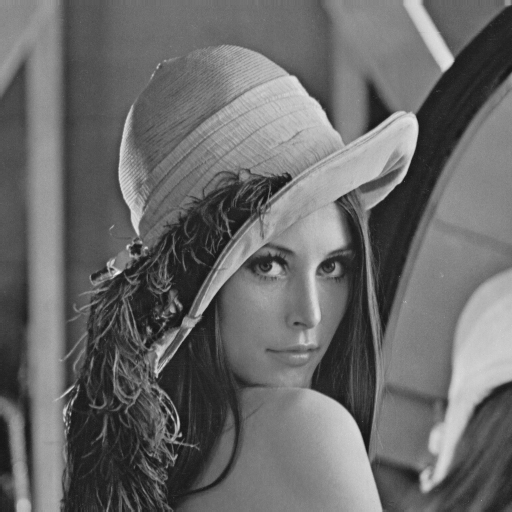

In [9]:
lena

In [10]:

input = to_tensor(lena).unsqueeze(0)
#锐化卷积核
kernel = t.ones(3,3)/-9
kernel[1][1] = 1
conv = nn.Conv2d(1,1,(3,3),1,bias = False)#神经网络都是四维


conv.weight.data = kernel.view(1,1,3,3)
to_tensor(lena).shape
to_tensor(lena).unsqueeze(0).shape

torch.Size([1, 1, 512, 512])

In [11]:
out  = conv(input)

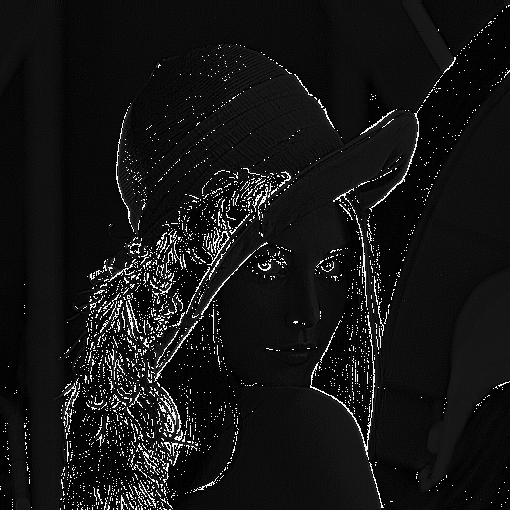

In [13]:
to_pil(out.data.squeeze(0))

In [14]:
pool = nn.AvgPool2d(2,2)
list(pool.parameters())#pool没有参数

[]

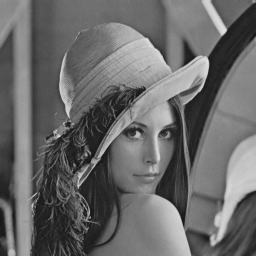

In [15]:
out = pool(input)
to_pil(out.squeeze(0))


In [16]:
input = t.randn(2,3)
linear = nn.Linear(3,4)
h = linear(input)
h

tensor([[ 0.1895,  0.4023, -0.0856,  0.4764],
        [-0.1150,  0.5353, -0.7456,  0.2854]], grad_fn=<ThAddmmBackward>)

In [20]:
bn = nn.BatchNorm1d(4)#channel = 4
bn.weight.data = t.ones(4)*4
bn.bias.data = t.zeros(4)
print("bn",bn)
print("bn.weight.data",bn.weight.data)

bn BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
bn.weight.data tensor([4., 4., 4., 4.])


In [25]:
bn_out = bn(h)
bn_out

tensor([[ 3.9991, -3.9955,  3.9998,  3.9978],
        [-3.9991,  3.9955, -3.9998, -3.9978]],
       grad_fn=<ThnnBatchNormBackward>)

In [30]:
dropout  = nn.Dropout(0.5)
o = dropout(bn_out)

# 激活函数

In [38]:
relu = nn.ReLU(inplace = True)
input  = t.randn(2,3)
print(input)
output = relu(input)
print(output)

tensor([[ 0.2335, -1.1188,  1.7927],
        [-0.8633, -0.3303, -0.3493]])
tensor([[0.2335, 0.0000, 1.7927],
        [0.0000, 0.0000, 0.0000]])


# 损失函数

In [42]:
#batch_size = 3
score = t.randn(3,2)
#三个样本分别属于1.0.1 类，label必须是LongTensor
label = t.Tensor([1,0,1]).long()
criterion =  nn.CrossEntropyLoss()
loss = criterion(score,label)
loss

tensor(0.4134)

# module 的深入分析

In [57]:
 class Net(nn.Module):
        def __init__(self):
            super(Net,self).__init__()
            self.param1 = nn.Parameter(t.rand(3,3))
            self.submodel1 = nn.Linear(3,4)
            self.param2 = t.randint(low = 0,high = 10,size = (2,3))
        def forward(self,input):
            x  = self.param1@input
            x = self.submodel1(x)
            return x
net = Net()
net
            
            

Net(
  (submodel1): Linear(in_features=3, out_features=4, bias=True)
)

In [58]:
net._modules

OrderedDict([('submodel1', Linear(in_features=3, out_features=4, bias=True))])

In [60]:
net._parameters


OrderedDict([('param1', Parameter containing:
              tensor([[0.4639, 0.8858, 0.0191],
                      [0.0911, 0.0058, 0.5291],
                      [0.6130, 0.3287, 0.3052]], requires_grad=True))])

In [62]:
for name ,param in net.named_parameters():
    print(name,param)

param1 Parameter containing:
tensor([[0.4639, 0.8858, 0.0191],
        [0.0911, 0.0058, 0.5291],
        [0.6130, 0.3287, 0.3052]], requires_grad=True)
submodel1.weight Parameter containing:
tensor([[-0.4125,  0.1795, -0.1511],
        [-0.3890, -0.0715, -0.4479],
        [-0.5555, -0.4429,  0.0468],
        [-0.0454,  0.4375, -0.3212]], requires_grad=True)
submodel1.bias Parameter containing:
tensor([ 0.0581,  0.4689,  0.5654, -0.2495], requires_grad=True)


In [65]:
for name,module in net.named_modules():
    print(name,module)

 Net(
  (submodel1): Linear(in_features=3, out_features=4, bias=True)
)
submodel1 Linear(in_features=3, out_features=4, bias=True)


In [67]:

bn = nn.BatchNorm1d(2)#通道或一维的个数c
input  = t.randn(3,2)
output = bn(input)
bn._buffers


OrderedDict([('running_mean', tensor([ 0.0185, -0.0607])),
             ('running_var', tensor([0.9681, 1.3732])),
             ('num_batches_tracked', tensor(1))])